In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('gene_expression.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [4]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [5]:
X = df.drop('Cancer Present', axis = 1)
y = df['Cancer Present']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=101)

In [7]:
base_model = KNeighborsClassifier()

In [8]:
scaler = StandardScaler()

In [9]:
pipe_steps = [('scaler', scaler), ('base_model',base_model)]

In [10]:
pipe = Pipeline(steps=pipe_steps)

In [11]:
# k_values = np.linspace(1,30, 30, dtype=np.int_)
k_values = list(range(1,31))

In [12]:
base_model.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [13]:
grid_params = {'base_model__n_neighbors':k_values }

In [14]:
grid_pipelined_model = GridSearchCV(estimator= pipe, scoring='accuracy',
                                    param_grid= grid_params, cv = 5, verbose = 1) 

In [15]:
grid_pipelined_model.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('base_model', KNeighborsClassifier())]),
             param_grid={'base_model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19, 20, 21, 22, 23,
                                                     24, 25, 26, 27, 28, 29,
                                                     30]},
             scoring='accuracy', verbose=1)

In [16]:
grid_pipelined_model.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('base_model', KNeighborsClassifier(n_neighbors=21))])

In [18]:
grid_pipelined_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('base_model', KNeighborsClassifier(n_neighbors=21))],
 'verbose': False,
 'scaler': StandardScaler(),
 'base_model': KNeighborsClassifier(n_neighbors=21),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'base_model__algorithm': 'auto',
 'base_model__leaf_size': 30,
 'base_model__metric': 'minkowski',
 'base_model__metric_params': None,
 'base_model__n_jobs': None,
 'base_model__n_neighbors': 21,
 'base_model__p': 2,
 'base_model__weights': 'uniform'}

In [19]:
# we don't need to scale the X_test as we're scaler in our pipeline
y_test_pred = grid_pipelined_model.predict(X_test)

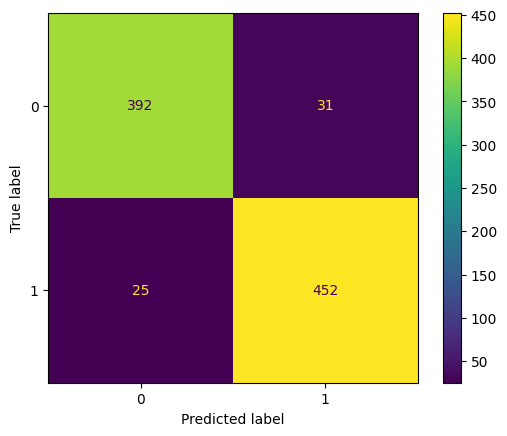

In [21]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred)).plot()

In [23]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       423
           1       0.94      0.95      0.94       477

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900

